In [6]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from loguru import logger
from model.efficientnet.net import EfficientNet
from tokenizers import Tokenizer

from dataset import bms_caption, collator

In [25]:
train_dir = "/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/train"
labels = "/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/train_labels.csv"

tk_model_file = "./checkpoints/bms_tokenizer.json"
tokenizer = Tokenizer.from_file(tk_model_file)
bbms_coll = collator.EncodedBatchCollator()
bbms = bms_caption.EncodedBBMS(train_dir, labels, tokenizer, mlm=True)
loader = DataLoader(bbms, batch_size=8, collate_fn=bbms_coll, num_workers=0, shuffle=True)

print(len(bbms))
print(bbms[1])

2021-04-17 20:31:46.061 | INFO     | dataset.bms_caption:get_samples:55 - [EncodedBBMS] get_samples
2021-04-17 20:31:56.031 | INFO     | dataset.bms_caption:get_samples:58 - [EncodedBBMS] find 2414826 imgs
2021-04-17 20:31:56.031 | INFO     | dataset.bms_caption:get_samples:64 - Load cached dataset samples from: /home/ron/bms_tmp/2414826.pickle


2414826
(tensor([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],

In [31]:

for batch_ndx, sample in enumerate(loader):
#     print(sample)
    break

In [32]:
img, boxes, ids, type_ids, atten_mask, mask_pos, mask_ids = sample

In [35]:
print(ids.shape)
print(atten_mask.shape)

torch.Size([8, 119])
torch.Size([8, 163, 163])


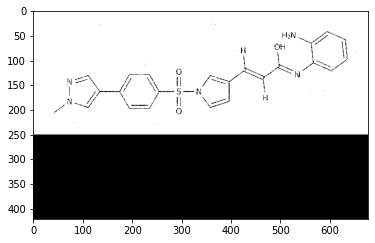

In [13]:
plt.imshow(img[6])

In [33]:
for i in range(len(ids)):
    print(f"[{i}]" + '-' * 100)
    print(ids.shape)
    print(ids[i])

[0]----------------------------------------------------------------------------------------------------
torch.Size([8, 119])
tensor([  1, 276,  33,  21,  55,  19,  39, 270,  44, 266, 318,  22,  50,  22,
         51,  24,  19,  71,  21,  17, 263,  17, 264,  12, 265,  17, 281,  17,
        262,  17,  25,  17,  23,  17,  22,  17,  24,  17,  26,  17, 262,  13,
        268,  12, 279,  17, 284,  17, 263,  13, 269,  12, 280,  13, 278,  17,
        261,  17,  27,  17,  28,  17, 267,  12, 266,  12, 271,  13,  29,  17,
        261,  13, 283,  17, 270,  12, 272,  13, 277,  19,  76,  22,  17,  29,
         16, 270,  44,  16, 265,  44,  22,  16,  21,  44,  23, 282,  44,  16,
        278,  16, 280,  13,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3])
[1]----------------------------------------------------------------------------------------------------
torch.Size([8, 119])
tensor([  1, 276,  33,  21,  55,  19,  39, 266,  44, 270,  50,  23,  51,  24,
    

In [34]:
[b.shape for b in boxes]

[torch.Size([40, 4]),
 torch.Size([27, 4]),
 torch.Size([29, 4]),
 torch.Size([20, 4]),
 torch.Size([43, 4]),
 torch.Size([28, 4]),
 torch.Size([28, 4]),
 torch.Size([27, 4])]

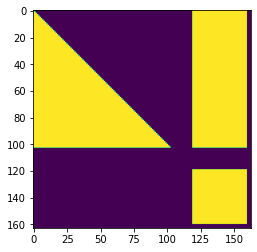

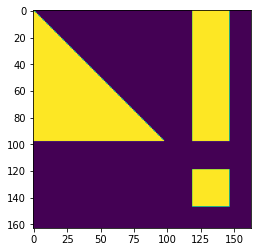

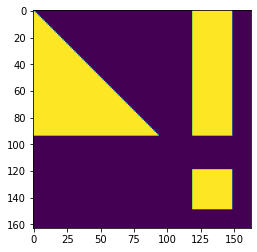

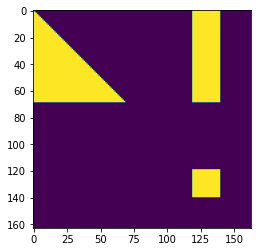

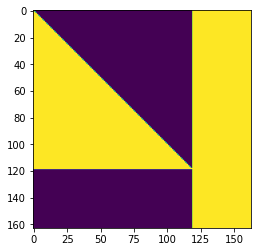

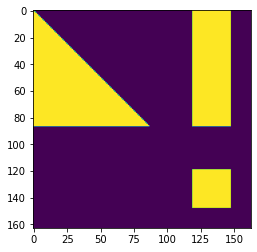

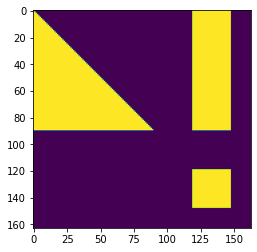

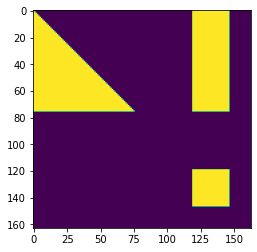

In [37]:
for i in range(len(atten_mask)):
    plt.imshow(atten_mask[i])
    plt.show()

In [39]:
normalize = tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [41]:
normalize(torch.ones(4, 10, 10))

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [45]:
hash('asdasd121')

6510733927303557075